# Лабораторная работа №4
### Воложанин В.О. ИВТ 1.3 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hour', 'n_requests'])
hours_data = data['hour']
requests_data = data['n_requests']

In [2]:
filtered_data = data.dropna()
hours_data = hours_data[pd.notna(requests_data)]
requests_data = requests_data[pd.notna(requests_data)]

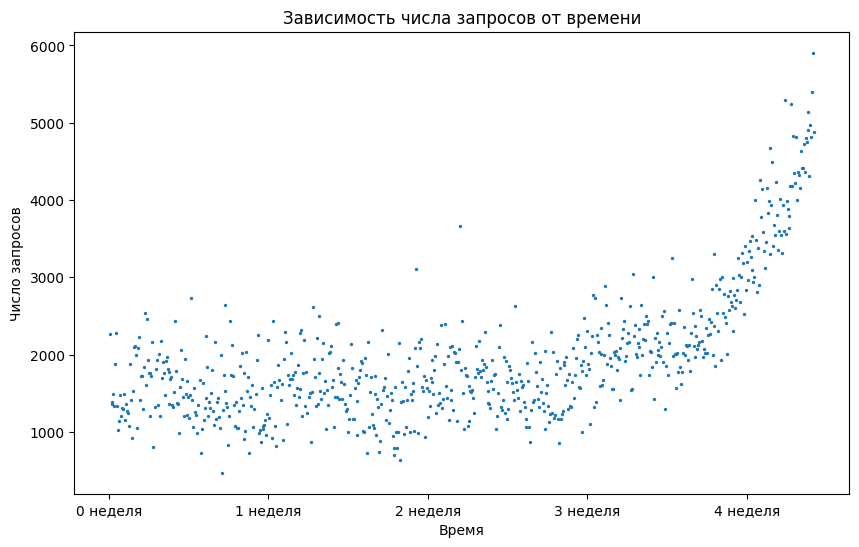

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(hours_data, requests_data, s=2, label='Данные')
plt.xlabel('Время')
plt.ylabel('Число запросов')
plt.title('Зависимость числа запросов от времени')
plt.xticks([w * 7 * 24 for w in range(6)], ["%i неделя" % w for w in range(6)])
plt.autoscale(tight=False)

/var/folders/g4/bf2qnm7d2wv93w55gnj671nm0000gn/T/ipykernel_9792/1519918773.py:4: RankWarning: Polyfit may be poorly conditioned
  f = np.poly1d(np.polyfit(hours_data, requests_data, degree))


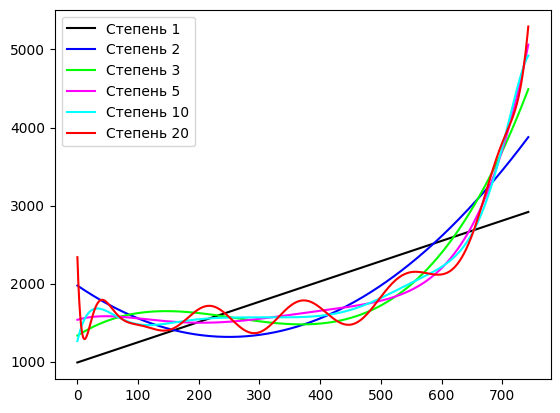

In [4]:
colors = ['black', 'blue', 'lime', 'magenta', 'cyan', 'red']
degrees = [1, 2, 3, 5, 10, 20]
for degree, color in zip(degrees, colors):
    f = np.poly1d(np.polyfit(hours_data, requests_data, degree))
    x = np.linspace(0, hours_data.max(), 1000)
    y = f(x)
    plt.plot(x, y, label='Степень {}'.format(degree), color=color)

plt.legend()
plt.show()

In [5]:
for degree in degrees:
    f = np.poly1d(np.polyfit(hours_data, requests_data, degree))
    predicted_values = f(hours_data)
    mse = mean_squared_error(requests_data, predicted_values)
    print("Степень полинома {}: MSE = {}".format(degree, mse))

Степень полинома 1: MSE = 431822.81270718103
Степень полинома 2: MSE = 244875.52092269278
Степень полинома 3: MSE = 189592.0326962248
Степень полинома 5: MSE = 169339.74770906614
Степень полинома 10: MSE = 165907.92702536422
Степень полинома 20: MSE = 150377.87109127195


/var/folders/g4/bf2qnm7d2wv93w55gnj671nm0000gn/T/ipykernel_9792/3270822063.py:2: RankWarning: Polyfit may be poorly conditioned
  f = np.poly1d(np.polyfit(hours_data, requests_data, degree))


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for degree in degrees:
    f = np.poly1d(np.polyfit(hours_data, requests_data, degree))
    predicted_values = f(hours_data)
    mse = mean_squared_error(requests_data, predicted_values)
    rmse = mean_squared_error(requests_data, predicted_values, squared=False)
    mae = mean_absolute_error(requests_data, predicted_values)
    print("Степень полинома {}: MSE = {}, RMSE = {}, MAE = {}".format(degree, mse, rmse, mae))

Степень полинома 1: MSE = 431822.81270718103, RMSE = 657.1322642415156, MAE = 504.88101037565264
Степень полинома 2: MSE = 244875.52092269278, RMSE = 494.84898799804853, MAE = 389.2663189980563
Степень полинома 3: MSE = 189592.0326962248, RMSE = 435.4216722858714, MAE = 344.1036970490545
Степень полинома 5: MSE = 169339.74770906614, RMSE = 411.5091101167338, MAE = 325.13909896864163
Степень полинома 10: MSE = 165907.92702536422, RMSE = 407.3179679628241, MAE = 319.0408273417002
Степень полинома 20: MSE = 150377.87109127195, RMSE = 387.78585726051426, MAE = 300.73478823407595


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: Futu

In [7]:
for degree in degrees:
    f = np.poly1d(np.polyfit(hours_data, requests_data, degree))
    predicted_values = f(hours_data)
    manual_mse = np.mean((requests_data - predicted_values) ** 2)
    library_mse = mean_squared_error(requests_data, predicted_values)
    print("Степень полинома {}: Manual MSE = {}, Library MSE = {}".format(degree, manual_mse, library_mse))

Степень полинома 1: Manual MSE = 431822.81270718103, Library MSE = 431822.81270718103
Степень полинома 2: Manual MSE = 244875.52092269278, Library MSE = 244875.52092269278
Степень полинома 3: Manual MSE = 189592.0326962248, Library MSE = 189592.0326962248
Степень полинома 5: Manual MSE = 169339.74770906614, Library MSE = 169339.74770906614
Степень полинома 10: Manual MSE = 165907.92702536422, Library MSE = 165907.92702536422
Степень полинома 20: Manual MSE = 150377.87109127195, Library MSE = 150377.87109127195


/var/folders/g4/bf2qnm7d2wv93w55gnj671nm0000gn/T/ipykernel_9792/753502855.py:2: RankWarning: Polyfit may be poorly conditioned
  f = np.poly1d(np.polyfit(hours_data, requests_data, degree))
